<p>In this guided project, we'll extend the work we did in the last two missions on visualizing the gender gap across college degrees. So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file. You can download the solutions for this guided project here.</p>

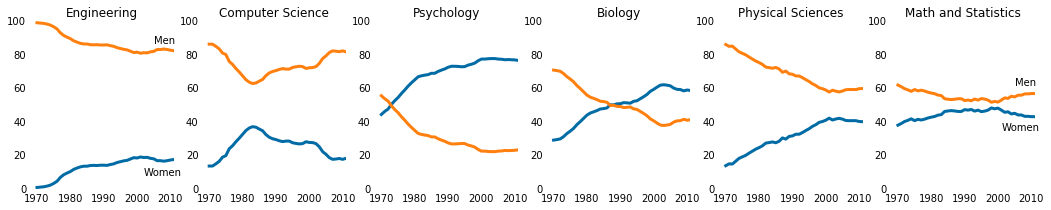

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

<p>Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:</p>

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

<p>While in the last mission, the stem_cats list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. You may have also noticed that while stem_cats and other_cats have six degree categories as elements, lib_arts_cats only has five. You'll need to not only modify the for loop to generate the STEM line charts that we wrote in the last mission but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.</p>

<p>
- Generate a 6 row by 3 column grid of subplots.<br><br>
- In the first column:<br>
1- Generate line charts for both male and female percentages for every degree in stem_cats.<br>
2- Add text annotations for Women and Men in the topmost and bottommost plots.<br><br>
- In the second column:<br>
1- Generate line charts for both male and female percentages for every degree in lib_arts_cats.<br>
2- Add text annotations for Women and Men for only the topmost plot (since the lines overlap at the end in the bottommost plot).<br><br>
- In the third column:<br>
1- Generate line charts for both male and female percentages for every degree in other_cats.<br>
2- Add text annotations for Women and Men in the topmost and bottommost plots.
</p>

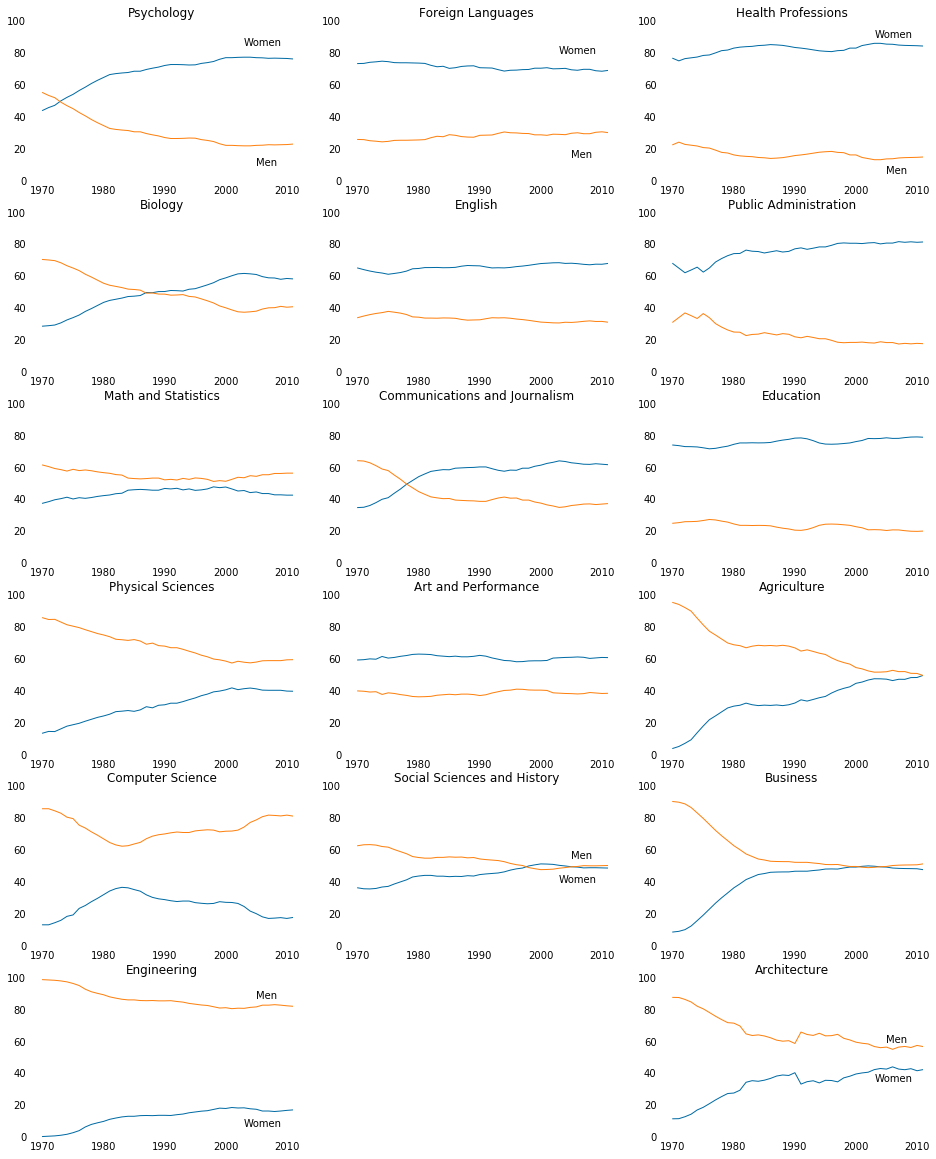

In [3]:
fig2 = plt.figure(figsize=(16, 20))
# Generate the first column
for sp in range(0, 18, 3):
    index = int(sp/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", right="off", left="off") 
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        
        
# Generate the second column
for sp in range(1, 16, 3):
    index = int((sp-1)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off") 
    ax.set_title(lib_arts_cats[index])
    if index == 0:
        ax.text(2003, 80, 'Women')
        ax.text(2005, 15, 'Men')
    elif index == 4:
        ax.text(2005, 55, 'Men')
        ax.text(2003, 40, 'Women')


# Generate the second column
for sp in range(2, 18, 3):
    index = int((sp-2)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off") 
    ax.set_title(other_cats[index])
    if index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women')

plt.show()

    
    

<p>With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to Axes.tick_params() and setting labelbottom to off:</p>

In [4]:
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

<p>This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:
</p>

In [5]:
ax.tick_params(labelbottom='on')

<p>
- Disable the x-axis labels for all line charts except the bottommost line charts in each column.
</p>

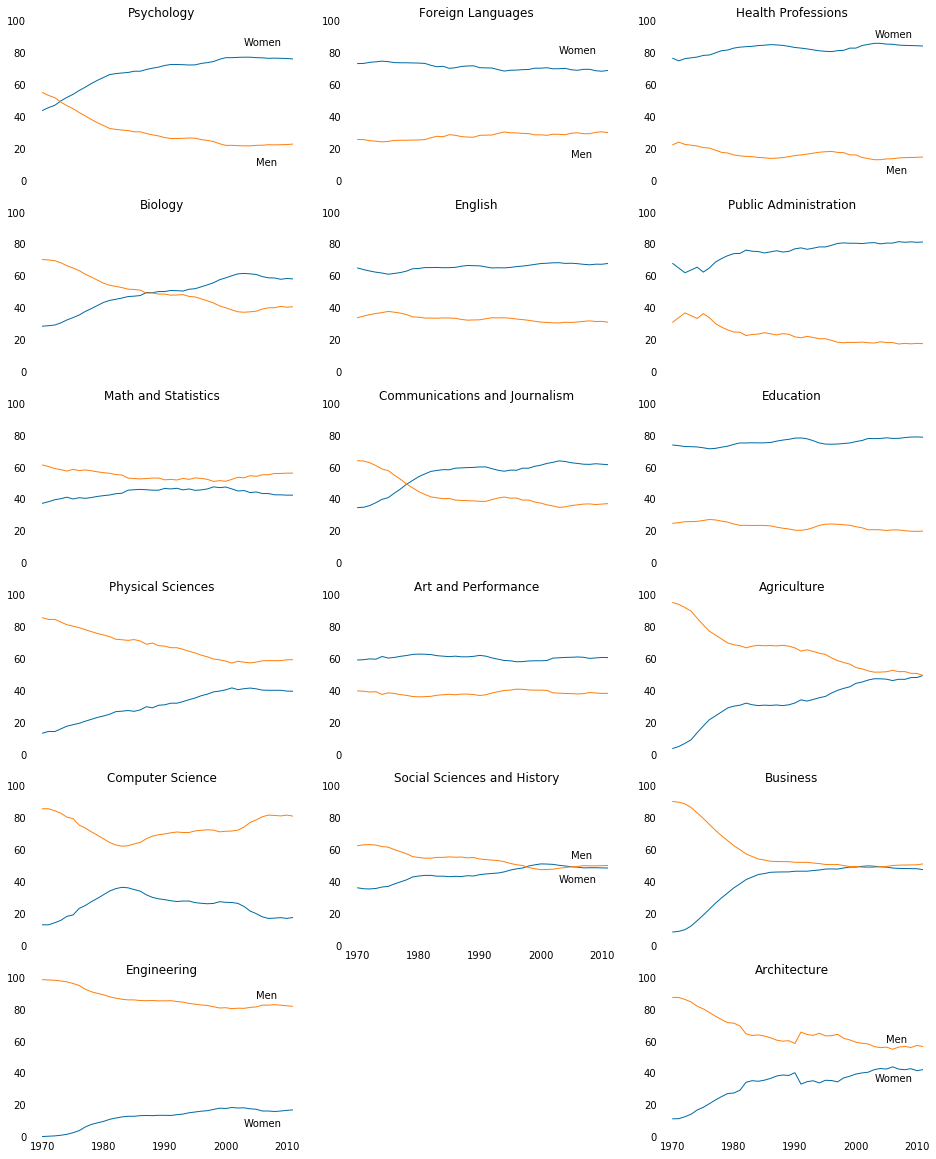

In [6]:
fig2 = plt.figure(figsize=(16, 20))
# Generate the first column
for sp in range(0, 18, 3):
    index = int(sp/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        
        
# Generate the second column
for sp in range(1, 16, 3):
    index = int((sp-1)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 4:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(lib_arts_cats[index])
    if index == 0:
        ax.text(2003, 80, 'Women')
        ax.text(2005, 15, 'Men')
    elif index == 4:
        ax.text(2005, 55, 'Men')
        ax.text(2003, 40, 'Women')


# Generate the second column
for sp in range(2, 18, 3):
    index = int((sp-2)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(other_cats[index])
    if index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women')

plt.show()

<p>Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.
<br><br>
In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.
<br><br>
We can use the Axes.set_yticks() method to specify which labels we want displayed. The following code enables just the 0 and 100 labels to be displayed:</p>

In [7]:
ax.set_yticks([0,100])

<p>
- For all plots:<br>
1- Enable just the y-axis labels at 0 and 100.
</p>

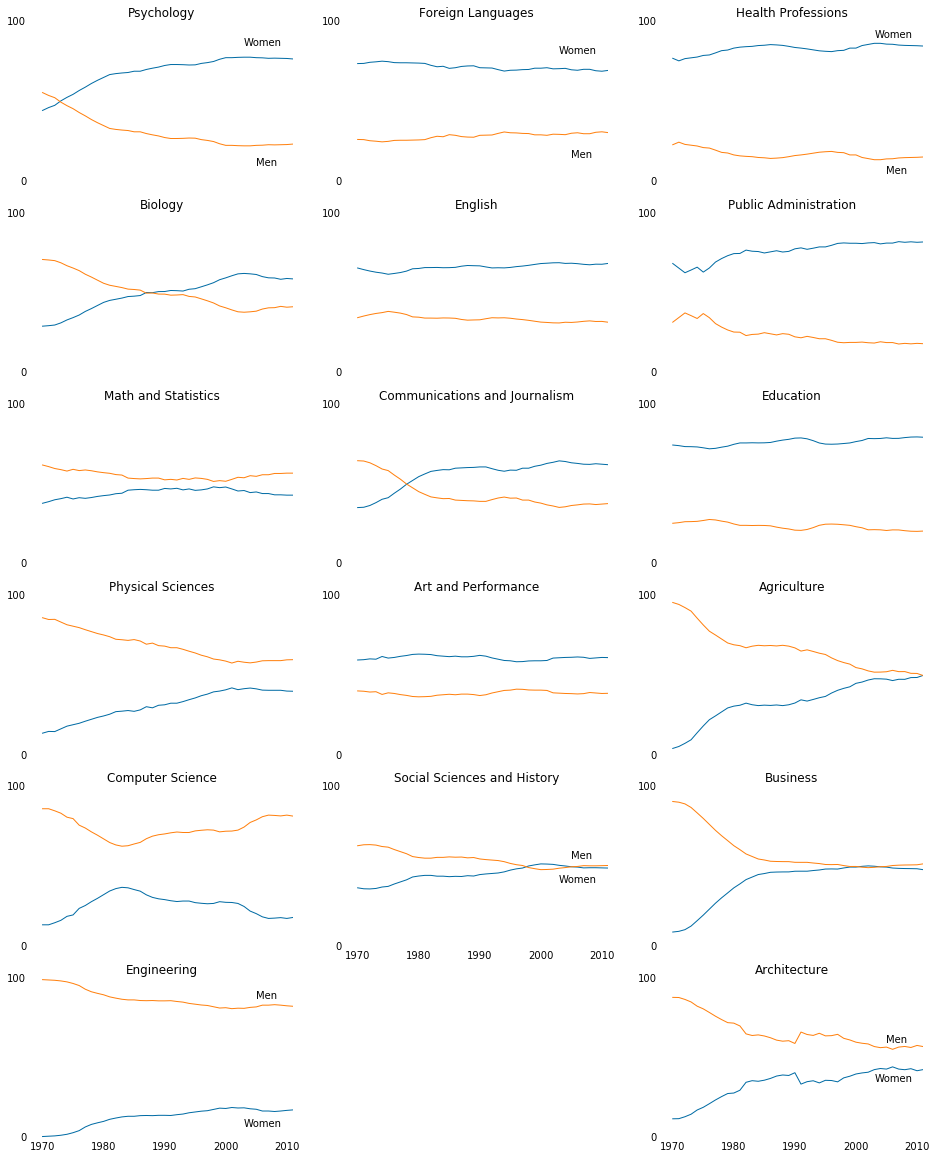

In [8]:
fig2 = plt.figure(figsize=(16, 20))
# Generate the first column
for sp in range(0, 18, 3):
    index = int(sp/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    ax.set_yticks([0,100])
        
        
# Generate the second column
for sp in range(1, 16, 3):
    index = int((sp-1)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 4:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(lib_arts_cats[index])
    if index == 0:
        ax.text(2003, 80, 'Women')
        ax.text(2005, 15, 'Men')
    elif index == 4:
        ax.text(2005, 55, 'Men')
        ax.text(2003, 40, 'Women')
    ax.set_yticks([0,100])


# Generate the second column
for sp in range(2, 18, 3):
    index = int((sp-2)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(other_cats[index])
    if index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women')
    ax.set_yticks([0,100])

plt.show()

<p>While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.
<br><br>
We can generate a horizontal line across an entire subplot using the Axes.axhline() method. The only required parameter is the y-axis location for the start of the line:</p>

In [9]:
ax.axhline(50)

<p>Let's use the next color in the Color Blind 10 palette for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the c parameter and the transparency using the alpha parameter. The value passed in to the alpha parameter must range between 0 and 1:</p>



In [10]:
ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

<p>- Generate a horizontal line with the following properties:<br>
1- Starts at the y-axis position 50<br>
2- Set to the third color (light gray) in the Color Blind 10 palette<br>
3- Has a transparency of 0.3</p>

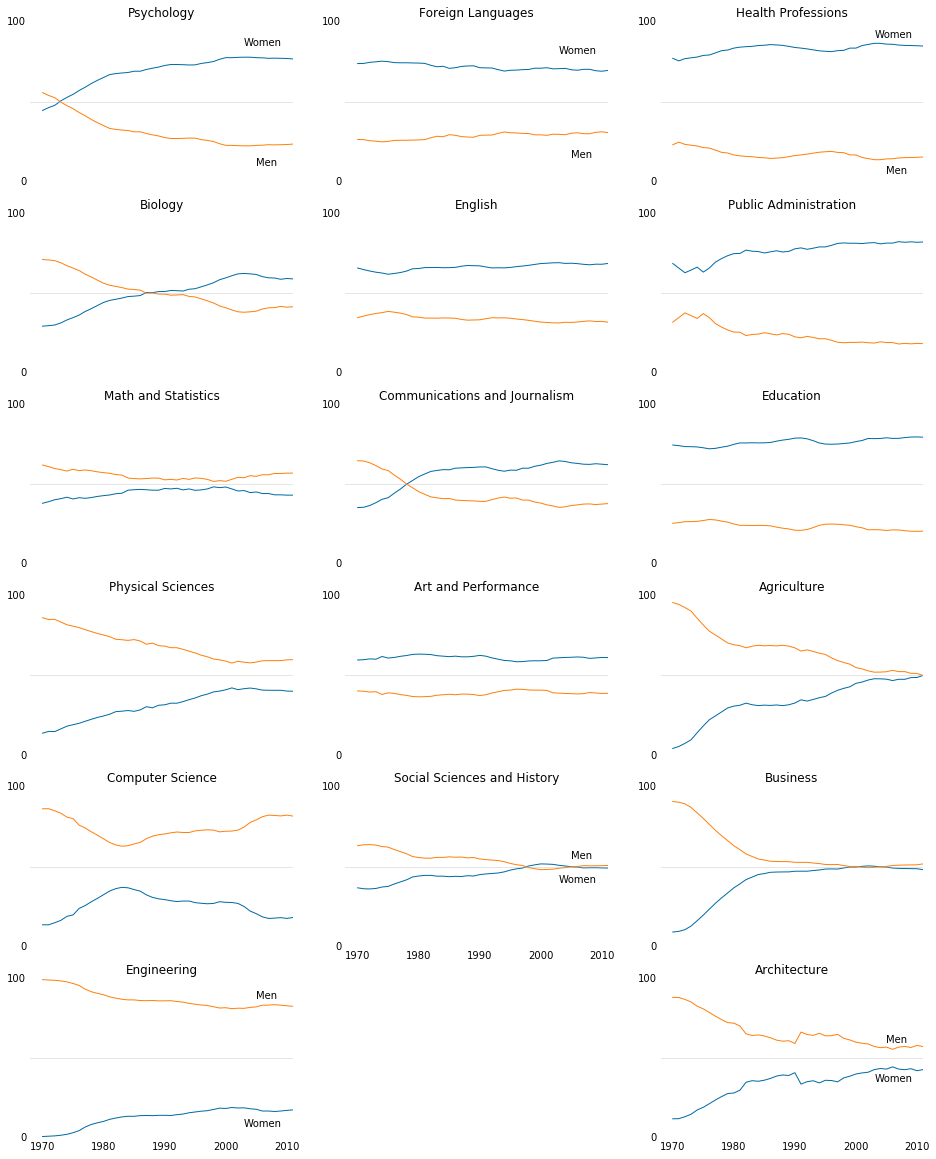

In [11]:
fig2 = plt.figure(figsize=(16, 20))
# Generate the first column
for sp in range(0, 18, 3):
    index = int(sp/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        
# Generate the second column
for sp in range(1, 16, 3):
    index = int((sp-1)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 4:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(lib_arts_cats[index])
    if index == 0:
        ax.text(2003, 80, 'Women')
        ax.text(2005, 15, 'Men')
    elif index == 4:
        ax.text(2005, 55, 'Men')
        ax.text(2003, 40, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)


# Generate the second column
for sp in range(2, 18, 3):
    index = int((sp-2)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(other_cats[index])
    if index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

plt.show()

<p>If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or backends. If you import matplotlib and run matplotlib.get_backend(), you'll see the specific backend you're currently using.
<br><br>
With the current backend we're using, we can use Figure.savefig() or pyplot.savefig() to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using pyplot.show().:</p>

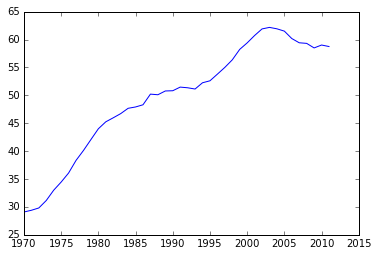

In [12]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')

<p>In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images here. The image will be exported into the same folder that your Jupyter Notebook server is running. You can click on the Jupyter logo to navigate the file system and find this image:

</p>

<p>
Curious to see what other students have done on this project? Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!
<br>
And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!
<br>
Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.
</p>

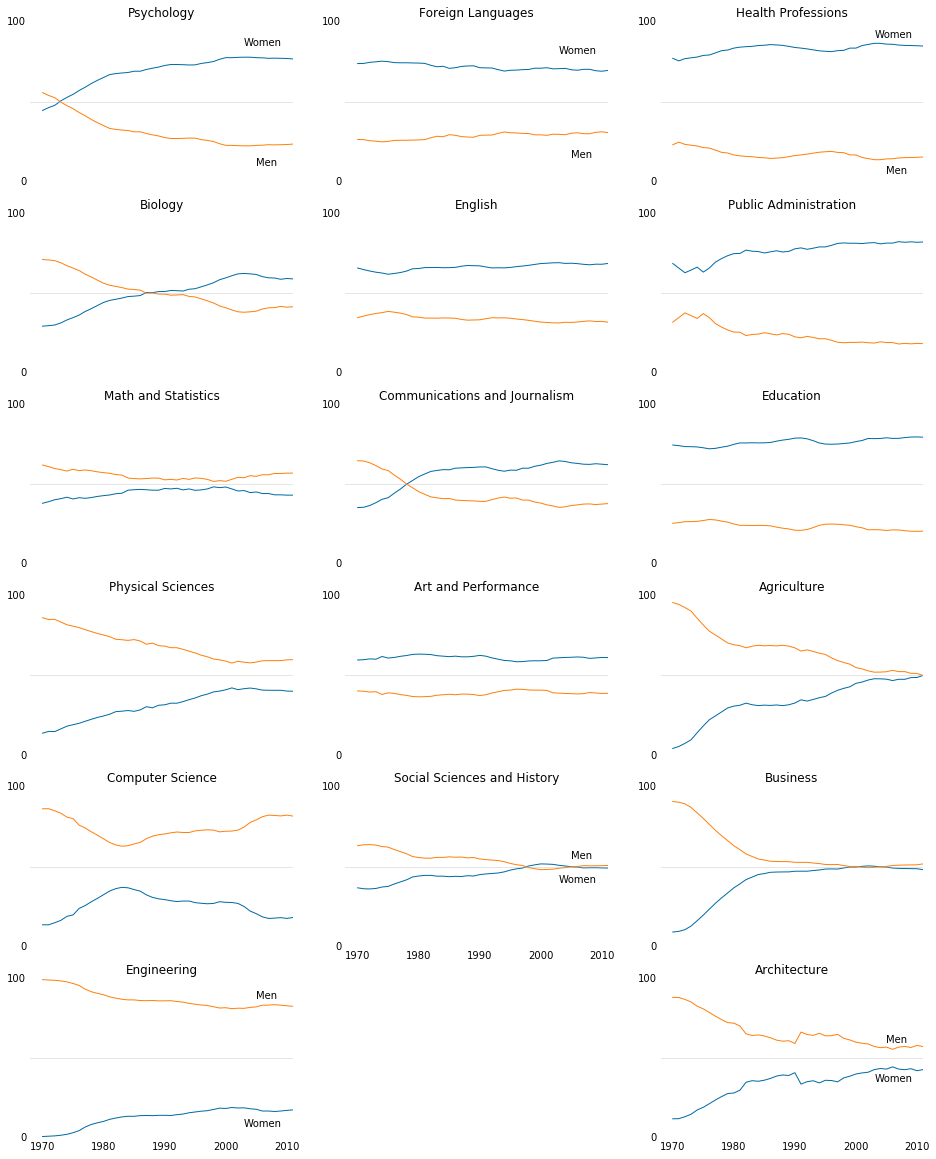

In [13]:
fig2 = plt.figure(figsize=(16, 20))
# Generate the first column
for sp in range(0, 18, 3):
    index = int(sp/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        
# Generate the second column
for sp in range(1, 16, 3):
    index = int((sp-1)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 4:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(lib_arts_cats[index])
    if index == 0:
        ax.text(2003, 80, 'Women')
        ax.text(2005, 15, 'Men')
    elif index == 4:
        ax.text(2005, 55, 'Men')
        ax.text(2003, 40, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)


# Generate the second column
for sp in range(2, 18, 3):
    index = int((sp-2)/3)
    ax = fig2.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[index]], label="Women", c=cb_dark_blue)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[index]], label="Men", c=cb_orange)
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="off") 
    if index == 5:
        ax.tick_params(bottom="off", top="off", right="off", left="off", labelbottom="on") 
    ax.set_title(other_cats[index])
    if index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
fig.savefig("gender_degrees.png")
plt.show()